In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


In [2]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten images
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# One-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [4]:
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),  # Hidden Layer
    layers.Dense(10, activation='softmax')                    # Output Layer
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [6]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_test, y_test)
)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7411 - loss: 1.0239 - val_accuracy: 0.9027 - val_loss: 0.3506
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9026 - loss: 0.3505 - val_accuracy: 0.9173 - val_loss: 0.2902
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9165 - loss: 0.2933 - val_accuracy: 0.9266 - val_loss: 0.2583
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9249 - loss: 0.2686 - val_accuracy: 0.9325 - val_loss: 0.2363
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9337 - loss: 0.2363 - val_accuracy: 0.9380 - val_loss: 0.2191
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9388 - loss: 0.2178 - val_accuracy: 0.9408 - val_loss: 0.2024
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9421 - loss: 0.2038 - val_accuracy: 0.9450 - val_loss: 0.1900
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9482 - loss: 0.1835 - 

In [7]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9457 - loss: 0.1863
Test Accuracy: 0.9534000158309937


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


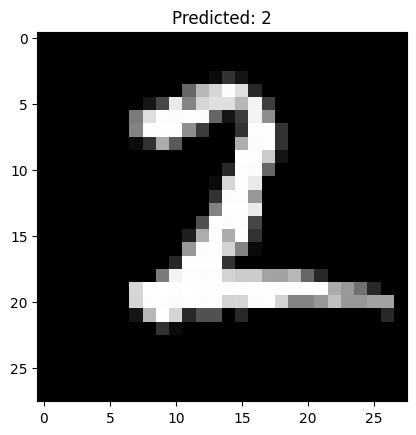

In [8]:
import random

index = random.randint(0, len(x_test)-1)

image = x_test[index].reshape(28,28)
prediction = model.predict(x_test[index].reshape(1,784))

plt.imshow(image, cmap='gray')
plt.title("Predicted: " + str(np.argmax(prediction)))
plt.show()


In [9]:
model.save("mnist_shallow_nn.h5")
